#Heart Disease Prediction

##Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

###Check tensorflow version

In [ ]:
tf.__version__

'2.17.0'

##Load the dataset

In [5]:
dataset = pd.read_csv('heart.csv')

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


###Shape of the dataset

In [7]:
dataset.shape

(1025, 14)

###Describe the dataset

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Missing values

In [9]:
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###Check if any missing values

In [10]:
flag = dataset.isnull().values.any()
print(flag)

False


##Make matrix of features and a dependent variable vector

In [11]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [12]:
print(X)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [13]:
print(y)

[0 0 0 ... 0 1 0]


##Splitting the data into training set and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [15]:
print(X_train)

[[42.  1.  3. ...  2.  2.  2.]
 [66.  0.  2. ...  1.  1.  2.]
 [53.  1.  2. ...  2.  3.  2.]
 ...
 [65.  1.  3. ...  1.  1.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [60.  1.  2. ...  1.  0.  2.]]


In [16]:
print(y_train)

[1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 1 0 

In [17]:
print(X_test)

[[44.  1.  2. ...  2.  0.  2.]
 [58.  0.  1. ...  2.  2.  2.]
 [63.  1.  0. ...  2.  2.  3.]
 ...
 [43.  0.  2. ...  1.  0.  2.]
 [66.  0.  0. ...  1.  2.  3.]
 [71.  0.  0. ...  1.  0.  2.]]


In [18]:
print(y_test)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


##Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Build ANN

###Intialize the ANN as a sequential model

In [20]:
ann = tf.keras.models.Sequential()

###Add the input layer and the first hidden layer

In [21]:
ann.add(tf.keras.layers.Dense(units = 6 , activation = 'relu'))

###Add the second hidden layer

In [22]:
ann.add(tf.keras.layers.Dense(units = 6 , activation = 'relu'))

###Add the output layer

In [23]:
ann.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

##Train the ANN

###Compile the ANN

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics=['accuracy'])

###Training on training set

In [26]:
ann.fit(X_train , y_train , batch_size = 16 ,epochs = 200)

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.2119
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9034 - loss: 0.2296
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9024 - loss: 0.2345
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.2150
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.2359
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9044 - loss: 0.2347
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9015 - loss: 0.2260
Epoch 8/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - loss: 0.2293
Epoch 9/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9183 - loss: 0.2116
Epoch 10/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8987 - loss: 0.2313
Epoch 11/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9047 - loss: 0.2145
Epoch 12/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

##Predicting test results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
print(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]

##Confusion Matrix

[[ 94   4]
 [  0 107]]


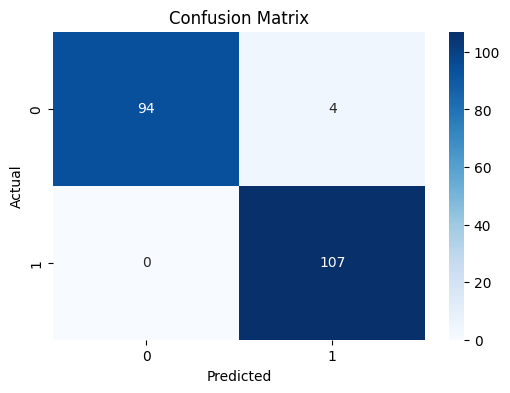

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Visualize it with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###Accuracy

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9804878048780488